## 5. Decision Tree

https://tianchi.aliyun.com/course/278/3422

#### Note:



### 5.1 Theoretical part 

The DT is a common classification model.

Key: based on tree-structure to divide data

Application: Financial risk control, medical auxiliary diagnosis

Advantage:
+ interpretable, generate understandable rules
+ discover importance of features
+ low computational complexity

Disadvantage:
+ easily prone to overfitting and needs branch reduction
+ no good use of continuous features
+ limited prediction ability, cannot achieve the effect as other strong supervision models
+ high variance, slight change in the data distribution can easily result in a completely different tree structure

由于决策树模型中自变量与因变量的非线性关系以及决策树简单的计算方法，使得它成为集成学习中最为广泛使用的基模型。

同时决策树在一些明确需要可解释性或者提取分类规则的场景中被广泛应用，而其他机器学习模型在这一点很难做到。
> 例如在医疗辅助系统中，为了方便专业人员发现错误，常常将决策树算法用于辅助病症检测。例如在一个预测哮喘患者的模型中，医生发现测试的许多高级模型的效果非常差。在他们运行了一个决策树模型后发现，算法认为剧烈咳嗽的病人患哮喘的风险很小。但医生非常清楚剧烈咳嗽一般都会被立刻检查治疗，这意味着患有剧烈咳嗽的哮喘病人都会马上得到收治。用于建模的数据认为这类病人风险很小，是因为所有这类病人都得到了及时治疗，所以极少有人在此之后患病或死亡。

> 在新的研究中，南京大学周志华教授提出一种多粒度级联森林模型，创造了一种全新的基于决策树的深度集成方法，为我们提供了决策树发展的另一种可能。


### 5.2 Practical part 

#### 5.2.1 Simulation

In [70]:
# Load pkg
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

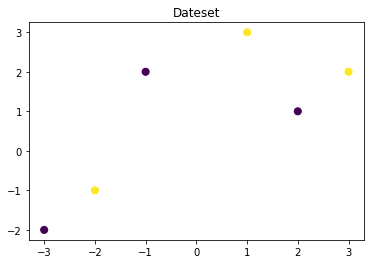

In [71]:
### Demo
# Simulating data
X_features = np.array([[-1,2],[-2,-1],[-3,-2],[1,3],[2,1],[3,2]])
y_label = np.array([0,1,0,1,0,1])

# Train
tree_clf = DecisionTreeClassifier()
tree_clf = tree_clf.fit(X_features, y_label)

# Visualization
plt.figure()
plt.scatter(X_features[:,0], X_features[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dateset')
plt.show()

The new point 1 predict class:  [1]
The new point 2 predict class:  [0]


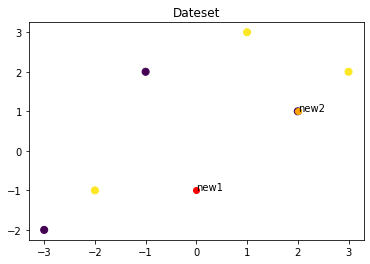

In [72]:
# new samples
x_new1 = np.array([[0,-1]])
x_new2 = np.array([[2,1]])

y_label_new1 = tree_clf.predict(x_new1)
y_label_new2 = tree_clf.predict(x_new2)

print('The new point 1 predict class: ', y_label_new1)
print('The new point 2 predict class: ', y_label_new2)

plt.figure()
plt.scatter(X_features[:,0], X_features[:,1], c=y_label, s=50, cmap='viridis')
plt.scatter(x_new1[:,0], x_new1[:,1], c='red')
plt.text(x_new1[:,0], x_new1[:,1], 'new1')
plt.scatter(x_new2[:,0], x_new2[:,1], c='orange')
plt.text(x_new2[:,0], x_new2[:,1], 'new2')
plt.title('Dateset')
plt.show()

In [73]:
# Visulization DT
import graphviz

dot_data = tree.export_graphviz(tree_clf, out_file=None)
graph = graphviz.Source(dot_data)
#graph.render("pengunis")
#graph.view(filename="DT",directory="D:\Documents")
# graphviz安装有问题，无法调用dot，没有bin目录

#### 5.5.2 Real Data - penguins

In [74]:
#!wget https://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/6tree/penguins_raw.csv

In [75]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
data = pd.read_csv('./penguins_raw.csv')
data.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


> 共有150个样本，目标变量为 企鹅的类别 其都属于企鹅类的三个亚属，分别是(Adélie, Chinstrap and > Gentoo)。包含的三种种企鹅的七个特征，分别是所在岛屿，嘴巴长度，嘴巴深度，脚蹼长度，身体体积，性别以及年龄。

> 本次我们选择企鹅数据（palmerpenguins）进行方法的尝试训练，该数据集一共包含8个变量，其中7个特征变量，1个目标分类变量。

In [77]:
# select 4 simple features
data = data[['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)']]
# why not select sex?
data.info()
data.head()
# found NaNs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Culmen Length (mm)   342 non-null    float64
 2   Culmen Depth (mm)    342 non-null    float64
 3   Flipper Length (mm)  342 non-null    float64
 4   Body Mass (g)        342 non-null    float64
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,Adelie Penguin (Pygoscelis adeliae),39.1,18.7,181.0,3750.0
1,Adelie Penguin (Pygoscelis adeliae),39.5,17.4,186.0,3800.0
2,Adelie Penguin (Pygoscelis adeliae),40.3,18.0,195.0,3250.0
3,Adelie Penguin (Pygoscelis adeliae),NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),36.7,19.3,193.0,3450.0


In [78]:
data.describe()
# mean 和 median差别不大

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


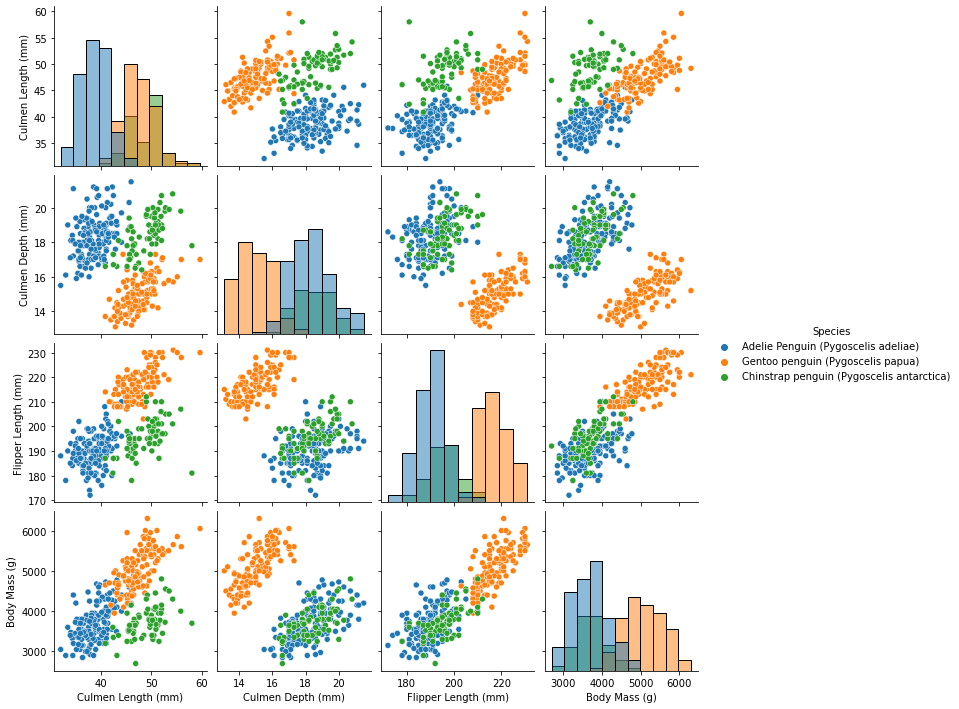

In [79]:
sns.pairplot(data=data, diag_kind='hist', hue= 'Species')
plt.show()

In [80]:
"""
为了方便我们将标签转化为数字
       'Adelie Penguin (Pygoscelis adeliae)'        ------0
       'Gentoo penguin (Pygoscelis papua)'          ------1
       'Chinstrap penguin (Pygoscelis antarctica)   ------2 
"""
def trans(x):
    if x == data['Species'].unique()[0]:
        return 0
    if x == data['Species'].unique()[1]:
        return 1
    if x == data['Species'].unique()[2]:
        return 2

data['Species'] = data['Species'].apply(trans)

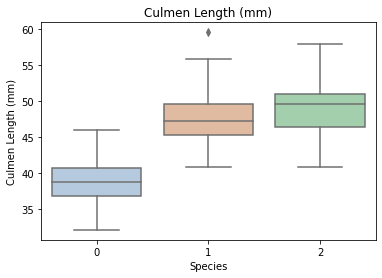

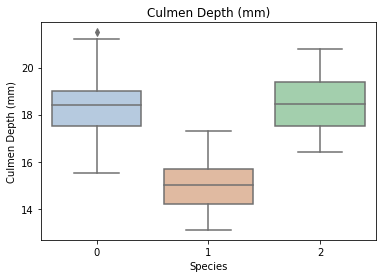

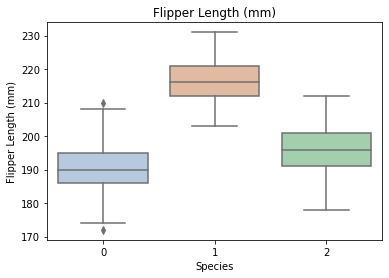

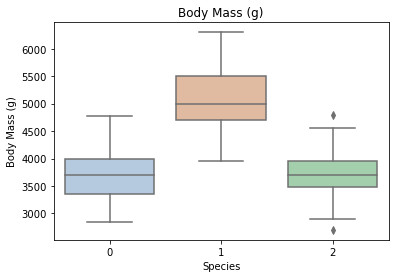

In [81]:
for col in data.columns:
    if col != 'Species':
        sns.boxplot(x='Species', y=col, saturation=0.5, palette='pastel', data=data)
        plt.title(col)
        plt.show()

In [82]:
# Fill NaN - method 1： -1
data_1 = data.copy()
data_1 = data_1.fillna(-1)

In [83]:
# Fill NaN - method 2： Median
data_2 = data.copy()
data_2 = data_2.fillna(data_2.median())

In [84]:
# Fill NaN - method 3： KNN 
from sklearn.impute import KNNImputer

data_3 = data.copy()
imputer = KNNImputer(n_neighbors=2, metric='nan_euclidean')
data_3 = imputer.fit_transform(data_3)

In [85]:
data_3

array([[0.000e+00, 3.910e+01, 1.870e+01, 1.810e+02, 3.750e+03],
       [0.000e+00, 3.950e+01, 1.740e+01, 1.860e+02, 3.800e+03],
       [0.000e+00, 4.030e+01, 1.800e+01, 1.950e+02, 3.250e+03],
       ...,
       [2.000e+00, 4.960e+01, 1.820e+01, 1.930e+02, 3.775e+03],
       [2.000e+00, 5.080e+01, 1.900e+01, 2.100e+02, 4.100e+03],
       [2.000e+00, 5.020e+01, 1.870e+01, 1.980e+02, 3.775e+03]])

### TWO - Classification

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

def select_data(dataset):
    dataset_target = dataset[dataset['Species'].isin([0,1])][['Species']]
    dataset_features = dataset[dataset['Species'].isin([0,1])][['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)']]
    return dataset_target, dataset_features

The accuracy of the Logistic Regression is (Train): 1.0
The accuracy of the Logistic Regression is (Test): 0.9821428571428571
The confusion matrix result:
 [[25  1]
 [ 0 30]]


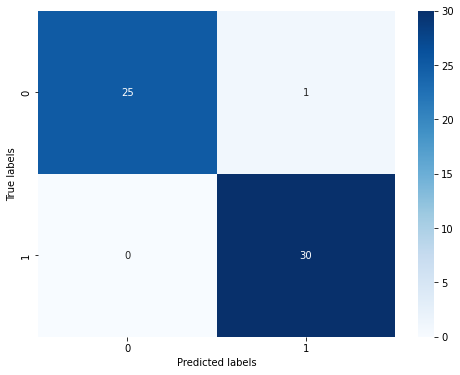

In [92]:
### Data_1; filling NaN with -1

y, X = select_data(data_1)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=2022)


clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_tr, y_tr)


train_predict = clf.predict(X_tr)
test_predict = clf.predict(X_te)

## accuracy
print('The accuracy of the Logistic Regression is (Train):',metrics.accuracy_score(y_tr,train_predict))
print('The accuracy of the Logistic Regression is (Test):',metrics.accuracy_score(y_te,test_predict))

## confusion matrix
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_te)
print('The confusion matrix result:\n',confusion_matrix_result)

# heatmap to visualize
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

The accuracy of the Logistic Regression is (Train): 1.0
The accuracy of the Logistic Regression is (Test): 0.9821428571428571
The confusion matrix result:
 [[25  1]
 [ 0 30]]


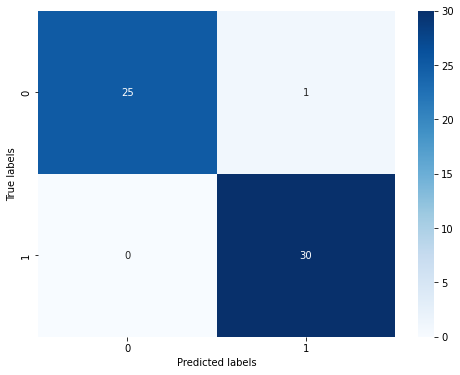

In [91]:
### Data_2; filling NaN with Median
y, X = select_data(data_2)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=2022)


clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_tr, y_tr)


train_predict = clf.predict(X_tr)
test_predict = clf.predict(X_te)

## accuracy
print('The accuracy of the Logistic Regression is (Train):',metrics.accuracy_score(y_tr,train_predict))
print('The accuracy of the Logistic Regression is (Test):',metrics.accuracy_score(y_te,test_predict))

## confusion matrix
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_te)
print('The confusion matrix result:\n',confusion_matrix_result)

# heatmap to visualize
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

The accuracy of the Logistic Regression is (Train): 1.0
The accuracy of the Logistic Regression is (Test): 1.0
The confusion matrix result:
 [[25  0]
 [ 0 31]]


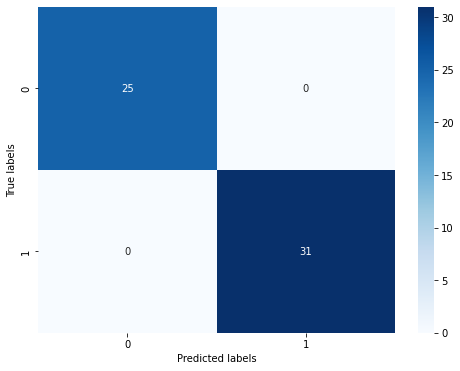

In [90]:
### Data_3; filling NaN with KNN
data_3 = pd.DataFrame(data_3, columns=data_1.columns)
y, X = select_data(data_3)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=2022)


clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_tr, y_tr)


train_predict = clf.predict(X_tr)
test_predict = clf.predict(X_te)

## accuracy
print('The accuracy of the Logistic Regression is (Train):',metrics.accuracy_score(y_tr,train_predict))
print('The accuracy of the Logistic Regression is (Test):',metrics.accuracy_score(y_te,test_predict))

## confusion matrix
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_te)
print('The confusion matrix result:\n',confusion_matrix_result)

# heatmap to visualize
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

NaN completing with KNN achieves higher accuracy in this case.

### Three - Classification

In [93]:
def all_classify(dataset,X_tr,X_te,y_tr,y_te):
    X = dataset[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)']]
    y = dataset[['Species']]
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=2022)

    clf = DecisionTreeClassifier(criterion='entropy')
    clf.fit(X_tr, y_tr)

    train_predict = clf.predict(X_tr)
    test_predict = clf.predict(X_te)

    ## accuracy
    print('The accuracy of the Logistic Regression is (Train):',metrics.accuracy_score(y_tr,train_predict))
    print('The accuracy of the Logistic Regression is (Test):',metrics.accuracy_score(y_te,test_predict))

    ## confusion matrix
    confusion_matrix_result = metrics.confusion_matrix(test_predict,y_te)
    print('The confusion matrix result:\n',confusion_matrix_result)

    # heatmap to visualize
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

The accuracy of the Logistic Regression is (Train): 0.9963636363636363
The accuracy of the Logistic Regression is (Test): 0.9565217391304348
The confusion matrix result:
 [[30  0  1]
 [ 0 25  0]
 [ 2  0 11]]


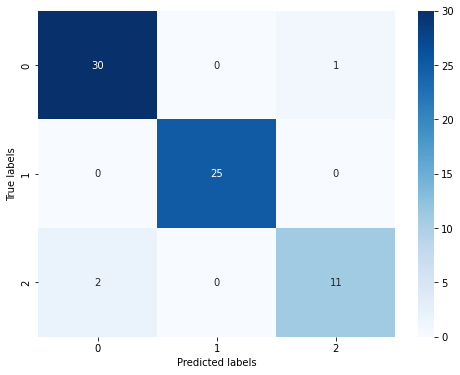

In [94]:
### Data_1; filling NaN with -1
all_classify(data_1, X_tr, X_te, y_tr, y_te)

The accuracy of the Logistic Regression is (Train): 0.9963636363636363
The accuracy of the Logistic Regression is (Test): 0.9710144927536232
The confusion matrix result:
 [[31  0  1]
 [ 0 25  0]
 [ 1  0 11]]


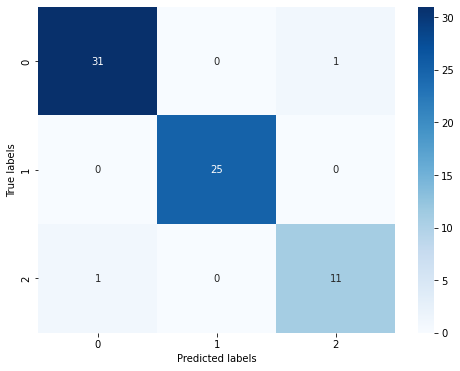

In [95]:
### Data_2; filling NaN with median
all_classify(data_2, X_tr, X_te, y_tr, y_te)

The accuracy of the Logistic Regression is (Train): 1.0
The accuracy of the Logistic Regression is (Test): 0.9565217391304348
The confusion matrix result:
 [[30  0  1]
 [ 0 25  0]
 [ 2  0 11]]


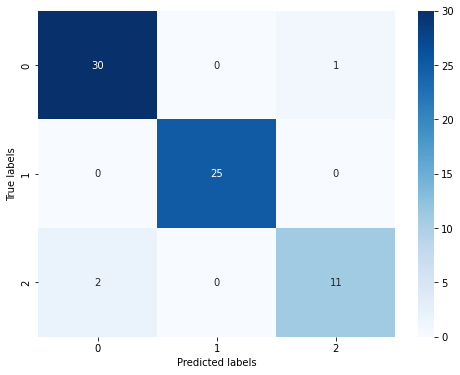

In [96]:
### Data_3; filling NaN with KNN
all_classify(data_3, X_tr, X_te, y_tr, y_te)